<a href="https://colab.research.google.com/github/Anukrati0609/course-recommendor-db/blob/main/fog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


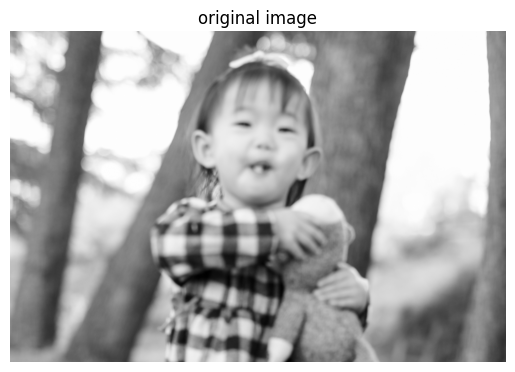

In [60]:
img= cv2.imread('/content/drive/MyDrive/ColabNotebooks/blur.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.title("original image")
plt.show()

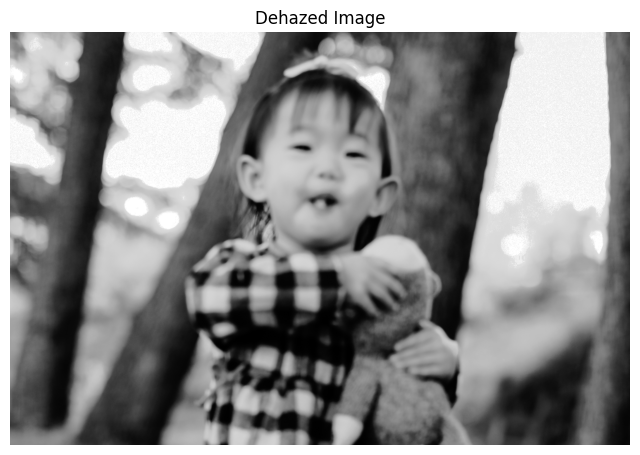

In [61]:
foggy = img_gray.copy()

def dehaze(img):
    return cv2.equalizeHist(img)

dehazed_img = dehaze(foggy)

# Display only the dehazed image
plt.figure(figsize=(8,6))
plt.imshow(dehazed_img, cmap='gray')
plt.axis('off')
plt.title("Dehazed Image")
plt.show()



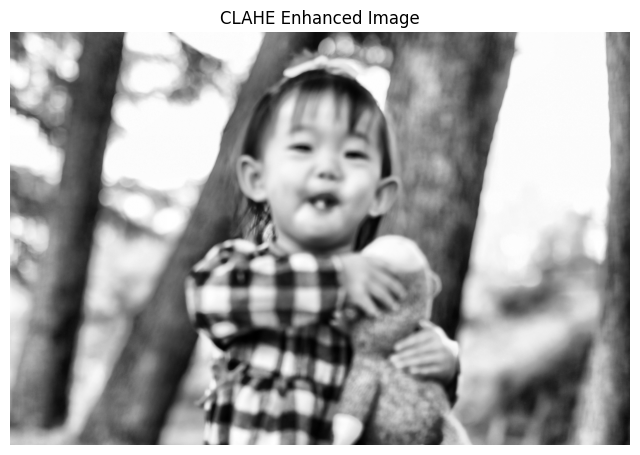

In [62]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img_gray)

# Display only the CLAHE enhanced image
plt.figure(figsize=(8,6))
plt.imshow(clahe_img, cmap='gray')
plt.axis('off')
plt.title("CLAHE Enhanced Image")
plt.show()

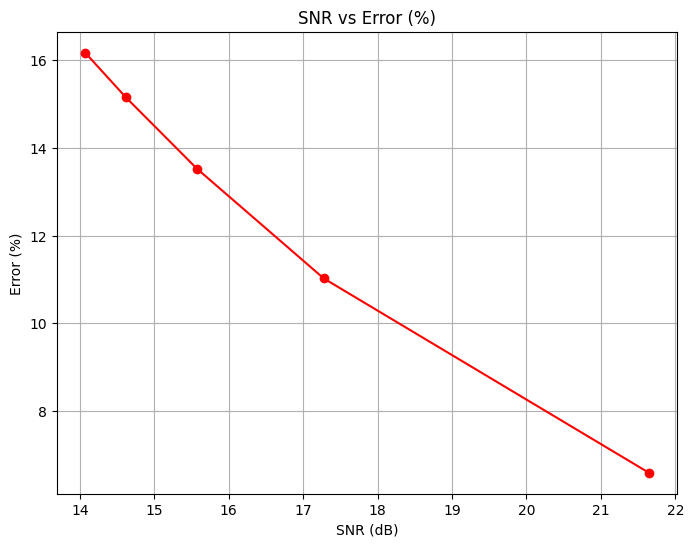

In [63]:


def calculate_snr(original, processed):
    # Flatten images
    orig = original.astype(np.float32).flatten()
    proc = processed.astype(np.float32).flatten()

    signal_power = np.sum(orig**2)
    noise_power = np.sum((orig - proc)**2)

    snr_db = 10 * np.log10(signal_power / noise_power)
    return snr_db

def calculate_error(original, processed):
    orig = original.astype(np.float32).flatten()
    proc = processed.astype(np.float32).flatten()

    error_percent = np.sum(np.abs(orig - proc)) / np.sum(np.abs(orig)) * 100
    return error_percent

# Example: multiple levels of processing (e.g., increasing CLAHE clip limits)
clip_limits = [1, 2, 3, 4, 5]
snr_values = []
error_values = []

for clip in clip_limits:
    clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=(8,8))
    processed_img = clahe.apply(img_gray)

    snr_values.append(calculate_snr(img_gray, processed_img))
    error_values.append(calculate_error(img_gray, processed_img))

# Plot SNR vs Error
plt.figure(figsize=(8,6))
plt.plot(snr_values, error_values, marker='o', color='red')
plt.title("SNR vs Error (%)")
plt.xlabel("SNR (dB)")
plt.ylabel("Error (%)")
plt.grid(True)
plt.show()
